In [53]:
import numpy as np 
import pandas as pd

data = pd.read_excel("E:/Users10/user/Desktop/mag/iad/labi/data/data_homework_sep.xlsx", sep=',', encoding='latin1', parse_dates=['dt'], dayfirst=True, index_col='dt')

Перед тем как работать с данными, необходимо понять, что они из себя представляют
Рассмотрим тип данных, состав, количество записей

In [54]:
#print(data.shape)
#data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936961 entries, 2015-12-10 to 2016-12-21
Data columns (total 10 columns):
patch          936961 non-null int64
player_id      936961 non-null int64
item_nation    936961 non-null object
item_class     936961 non-null object
item_level     936961 non-null int64
kills_made     936961 non-null int64
credits        936961 non-null int64
exp            936961 non-null int64
is_surv        936961 non-null int64
is_win         936961 non-null int64
dtypes: int64(8), object(2)
memory usage: 78.6+ MB


 видим, что данные представляют собой таблицу из 11 колонок и 936961 строк. 8 столбцов имеют числовые значения, две колонки содержат текст и одна колонка имеет тип даты (данной колонки в списке выше нет, так как при загрузке данных из файла мы определили ее как индекс, необходимый для дальнейшего анализа)
Все значения на месте (нет Null).
Теперь посмотрим на разброс значений, среднюю величину и медиану

In [55]:
data.describe()

,patch,player_id,item_level,kills_made,credits,exp,is_surv,is_win
count,936961.000000,9.369610e+05,936961.000000,936961.000000,9.369610e+05,936961.000000,936961.000000,936961.000000
mean,1.493547,1.786583e+06,6.257881,0.478980,1.537087e+04,488.966245,0.767380,0.461934
std,0.499959,4.692100e+04,1.993074,0.861424,1.223483e+04,480.413210,0.422502,0.498549
min,1.000000,1.701265e+06,1.000000,0.000000,-2.145600e+04,0.000000,0.000000,0.000000
25%,1.000000,1.743180e+06,5.000000,0.000000,7.603000e+03,183.000000,1.000000,0.000000
50%,1.000000,1.799432e+06,6.000000,0.000000,1.219000e+04,346.000000,1.000000,0.000000
75%,2.000000,1.818456e+06,8.000000,1.000000,1.912100e+04,635.000000,1.000000,1.000000
max,2.000000,1.847140e+06,10.000000,12.000000,2.031382e+06,9385.000000,1.000000,1.000000


визуализировать результат можно через data.boxplot(column=['xxx'])

Посмотрели на средние значения, минимальные и максимальные, картинку Boxplot. Некоторые значения в принципе можно было бы корректировать на выбросы (исходя из средних, максимальных, минимальных значений), но пока оставим как есть и посмотрим, что будет дальше

In [56]:
data.head()

,patch,player_id,item_nation,item_class,item_level,kills_made,credits,exp,is_surv,is_win
dt,,,,,,,,,,
2015-12-10,1,1813476,USSR,AT-SPG,5,0,12057,369,1,1
2015-12-10,1,1722910,USA,lightTK,9,0,21192,917,0,1
2015-12-10,1,1795566,USSR,heavyTK,8,0,8213,80,1,0
2015-12-10,1,1717262,FRANCE,lightTK,9,1,23606,1073,1,1
2015-12-10,1,1714046,CHINA,heavyTK,8,1,33086,395,1,0


На данные мы посмотрели, теперь приступим к их анализу.
Поскольку задачей было определить, как повлияли на качество игры патчи и какой из них был лучше, целесообразно разбить выборку на два периода (период, когда был введен первый патч, и период, когда был введен второй). Плюс ко всему, данные приведены лишь за декабрь 2015 и декабрь 2016 годов, промежуточные результаты игры отсутствуют.
Также сгруппируем данные по датам в пределах дня (суммируем по полям с числовыми данными, кроме колонок "patch" и "player_id")

In [57]:
patch1 = data.loc[data['patch'].isin(['1'])]
# patch1s = patch1[['item_class',"item_level","kills_made",'credits','exp','is_surv','is_win']].groupby(['dt','item_class']).aggregate(sum)
patch1s = patch1[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)
print(patch1s)

            item_level  kills_made    credits       exp  is_surv  is_win
dt                                                                      
2015-12-10      180887       14303  447220285  13256225    22523   13701
2015-12-11      190648       14616  454624585  13595882    23946   14493
2015-12-12      198542       15159  475998266  14166374    24055   14497
2015-12-13      199036       15118  482902189  14448386    24350   14891
2015-12-14      205481       15076  482440776  14357517    25574   14980
2015-12-15      201761       15249  485970874  14585197    24920   14878
2015-12-16      165016       14299  400721289  12165567    21636   13008
2015-12-17      202723       16398  493246457  14668501    25383   15232
2015-12-18      218640       17473  522469108  15739147    27233   16520
2015-12-19      219309       17443  524448699  15785113    26637   16283
2015-12-20      224858       17685  539890781  16231939    26604   16527
2015-12-21      204625       15554  488367169  1459

Для удобства выведем несколько значений на один график 

patch: 1
quality of players =  269


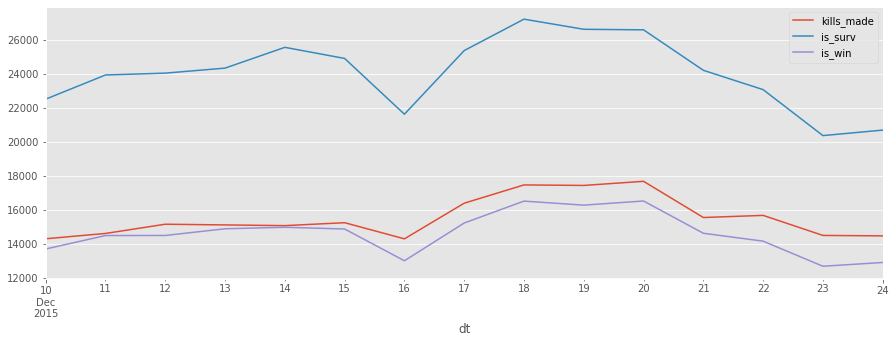

In [58]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
plt.rcParams['agg.path.chunksize'] = 1000000

patch1s[['kills_made',"is_surv",'is_win']].plot()

print("patch: 1")
a = len(patch1['player_id'].unique())
print("quality of players = ", a)

поскольку визуально определить, улучшилась ситуация или нет, затруднительно, посчитаем средние значения

In [75]:
before = (14303+14616+15159+15118+15076+15249)/6
print("killsmade_before = ", before)
after = (16398+17473+17443+17685+15554+15680+14500+14473)/8
print("killsmade_after = ", after)

before = (22523+23946+24055+24350+25574+24920)/6
print("issurv_before = ", before)
after = (25383+27233+26637+26604+24222+23083+20377+20701)/8
print("issurv_after = ", after)

before = (13701+14493+14497+14891+14980+14878)/6
print("iswin_before = ", before)
after = (15232+16520+16283+16527+14627+14162+12685+12907)/8
print("iswin_after = ", after)

killsmade_before =  14920.166666666666
killsmade_after =  16150.75
issurv_before =  24228.0
issurv_after =  24280.0
iswin_before =  14573.333333333334
iswin_after =  14867.875


Видим, что после первого патча количество убитых противников, количество побед и количество поражений увеличилось
позже посмотрим, за счет чего побеждали (какое оружие улучшило свой уровень)

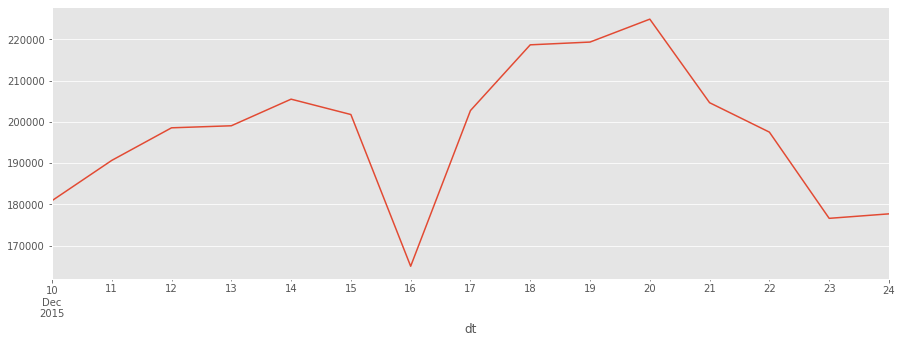

In [21]:
patch1s["item_level"].plot()

In [76]:
before = (180887+190648+198540+199036+205481+201761)/6
print("itemlevel_before = ", before)
after = (202723+218640+219309+224858+204625+197499+176617+177705)/8
print("itemlevel_after = ", after)

itemlevel_before =  196058.83333333334
itemlevel_after =  202747.0


уровень оружия после патча увеличился

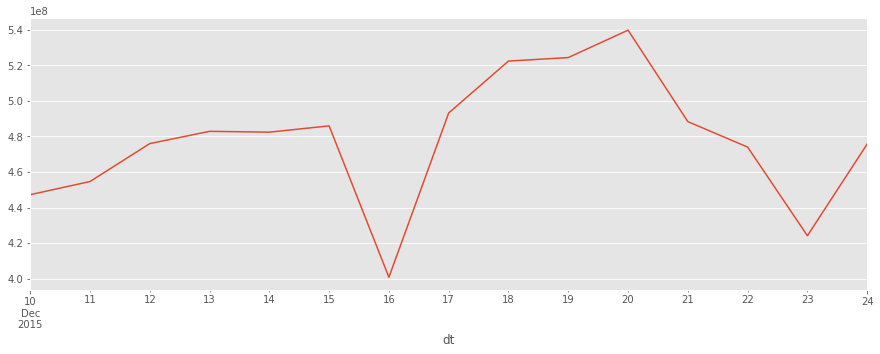

In [79]:
patch1s["credits"].plot()

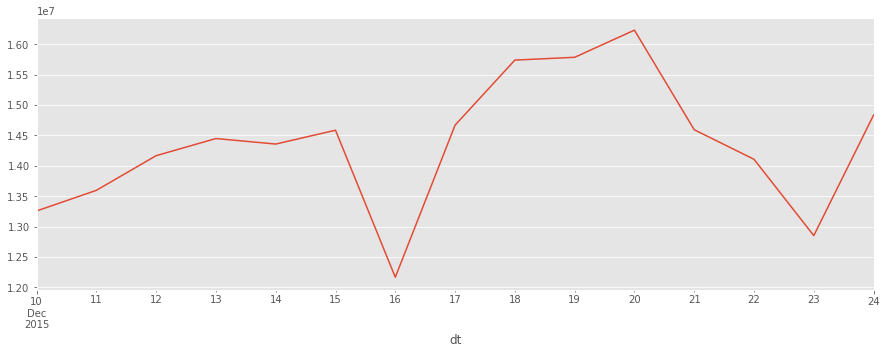

In [78]:
patch1s["exp"].plot()

сумма кредитов и опыт явно увеличились, но стали значительно колебаться.
еперь рассмотрим, к чему привел второй патч

In [80]:
patch2 = data.loc[data['patch'].isin(['2'])]
patch2s = patch2[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)
print(patch2s)

            item_level  kills_made    credits       exp  is_surv  is_win
dt                                                                      
2016-12-07      162127       12569  403140970  12693440    20454   12401
2016-12-08      169980       12914  429048764  13248153    21299   12719
2016-12-09      178486       12986  446323492  13634878    22015   13356
2016-12-10      191303       14350  480325525  16568398    23055   14024
2016-12-11      200709       14623  492669778  17268215    24689   14744
2016-12-12      196713       14555  487842086  17191472    24105   14424
2016-12-13      212848       15739  530238039  18381930    26242   15722
2016-12-14      141630       11980  358619544  13298146    18738   11198
2016-12-15      205054       15915  512234799  18074644    26265   15586
2016-12-16      201679       14971  540107618  18522648    25047   14844
2016-12-17      226994       16696  569684663  19459377    27774   16441
2016-12-18      218683       15889  533659972  1752

patch: 2
quality of players =  249


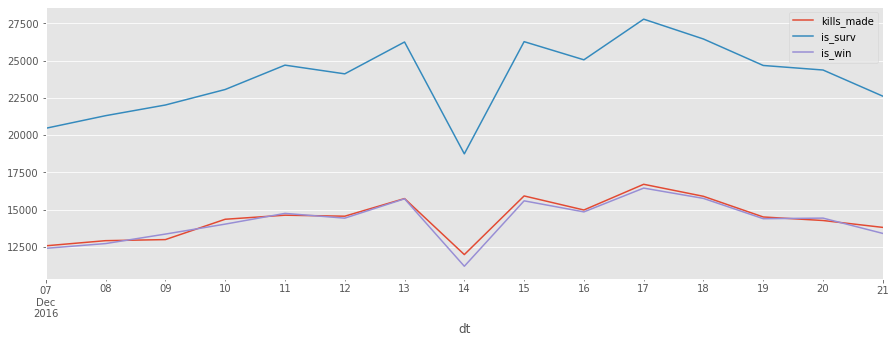

In [81]:
patch2s[['kills_made',"is_surv",'is_win']].plot()

a = len(patch2['player_id'].unique())
print("patch: 2")
print("quality of players = ",a)

In [82]:
before = (12569+12914+12986+14350+14623+14555+15739)/7
print("killsmade_before = ", before)
after = (15915+14971+16696+15889+14503+14266+13804)/7
print("killsmade_after = ", after)

before = (20454+21299+22015+23055+24689+24105+26242)/7
print("issurv_before = ", before)
after = (26265+25047+27774+26442+24667+24362+22607)/7
print("issurv_after = ", after)

before = (12401+12719+13356+14024+14744+14424+15722)/7
print("iswin_before = ", before)
after = (15586+14844+16441+15749+14388+14427+13400)/7
print("iswin_after = ", after)

killsmade_before =  13962.285714285714
killsmade_after =  15149.142857142857
issurv_before =  23122.714285714286
issurv_after =  25309.14285714286
iswin_before =  13912.857142857143
iswin_after =  14976.42857142857


После второго патча рассматриваемые показатели также увеличились, но количество выигрышей и поражений увеличились значительнее, чем после первого патча

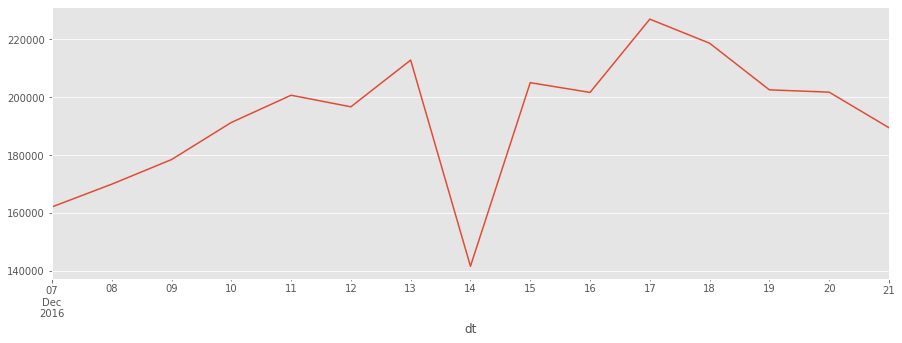

In [83]:
patch2s["item_level"].plot()

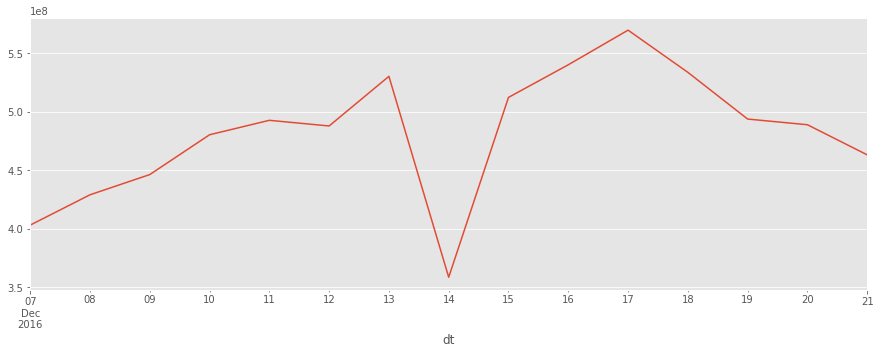

In [85]:
patch2s["credits"].plot()

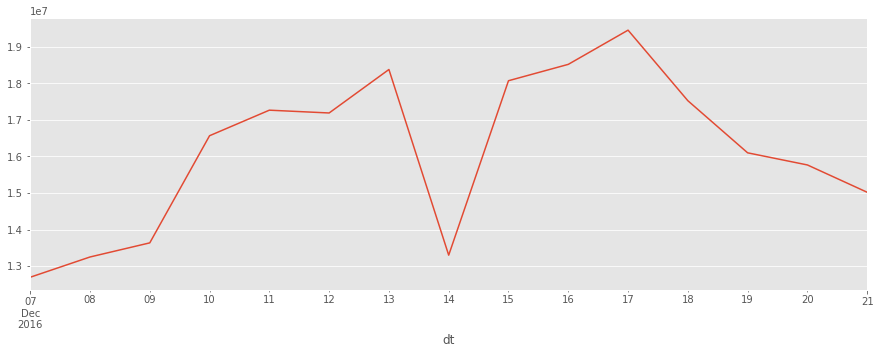

In [86]:
patch2s["exp"].plot()

уровень оружия, опыт и количество кредитов также увеличились 
Интересно посмореть, какие конкретно классы оружия улучшились

In [89]:
ATSPG1 = data.loc[(data['patch'].isin(['1'])) & (data['item_class'].isin(['AT-SPG']))]
ATSPG1s = ATSPG1[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

ATSPG2 = data.loc[(data['patch'].isin(['2'])) & (data['item_class'].isin(['AT-SPG']))]
ATSPG2s = ATSPG2[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

print('patch = 1', ATSPG1s)
print('patch = 2',ATSPG2s)

patch = 1             item_level  kills_made   credits      exp  is_surv  is_win
dt                                                                    
2015-12-10       20572        2030  42707280  1445011     2558    1580
2015-12-11       26150        2239  53942763  1726197     3218    1925
2015-12-12       27763        2451  59950467  1918849     3233    2017
2015-12-13       29475        2756  66568891  2089571     3387    2196
2015-12-14       30692        2685  66651261  2066832     3608    2129
2015-12-15       26064        2415  59374015  1839226     3086    1817
2015-12-16       22345        2071  50908615  1611110     2579    1608
2015-12-17       24687        2265  53521473  1689818     2904    1740
2015-12-18       25910        2370  59040876  1829734     2953    1808
2015-12-19       25098        2351  56653728  1780709     2903    1791
2015-12-20       28140        2580  64407726  2001881     3162    1992
2015-12-21       29334        2532  68951009  2029572     3287    1

item_class: AT-SPG
patch: 1
quality of players =  224


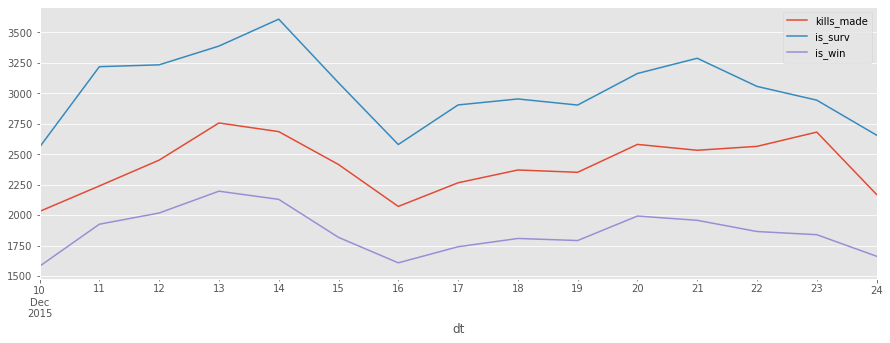

In [90]:
ATSPG1s[['kills_made',"is_surv",'is_win']].plot()
print("item_class: AT-SPG")
print("patch: 1")
a = len(ATSPG1['player_id'].unique())
print("quality of players = ",a) 



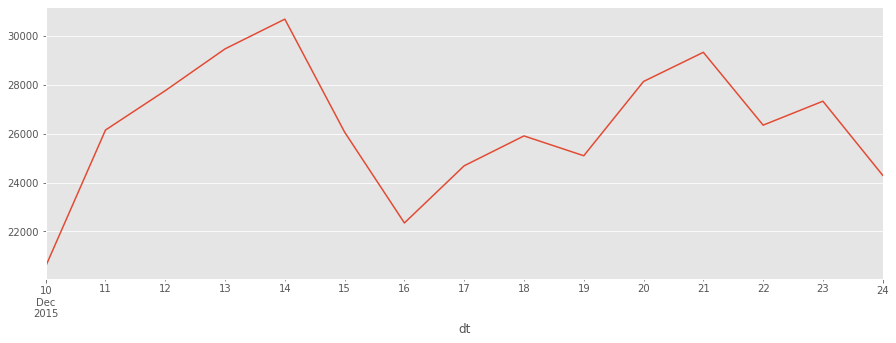

In [93]:
ATSPG1s['item_level'].plot()

item_class: AT-SPG
patch: 2
quality of players =  191


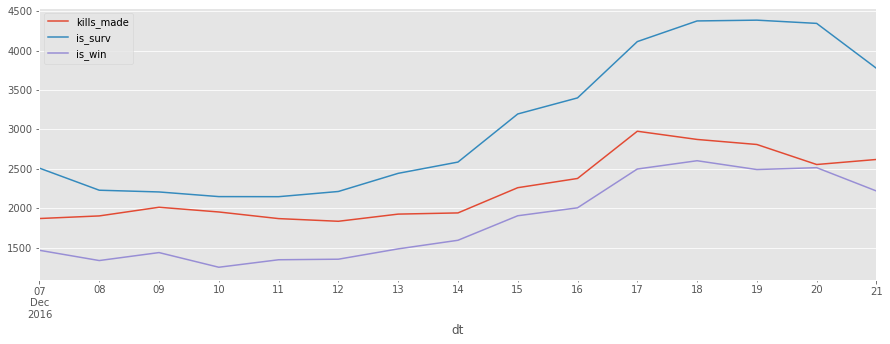

In [91]:
ATSPG2s[['kills_made',"is_surv",'is_win']].plot()
print("item_class: AT-SPG")
print("patch: 2")
a = len(ATSPG2['player_id'].unique())
print("quality of players = ",a) 

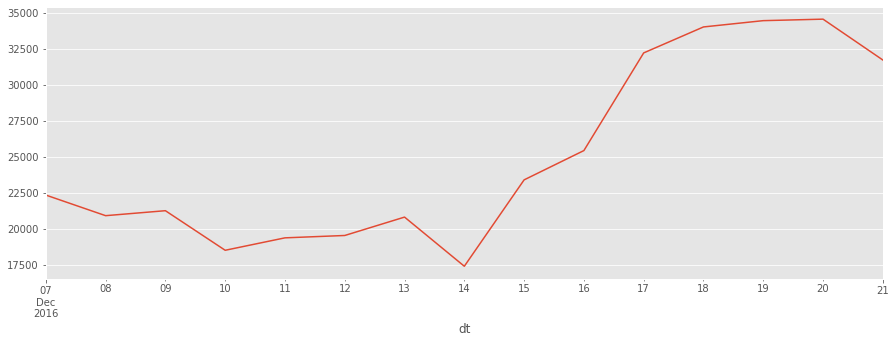

In [92]:
ATSPG2s['item_level'].plot()

Сильно возрасли показатели по классу оружия "AT-SPG" только после второго патча

In [94]:
lightTK1 = data.loc[(data['patch'].isin(['1'])) & (data['item_class'].isin(['lightTK']))]
lightTK1s = lightTK1[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

lightTK2 = data.loc[(data['patch'].isin(['2'])) & (data['item_class'].isin(['lightTK']))]
lightTK2s = lightTK2[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

print(lightTK1s)
print(lightTK2s)

            item_level  kills_made   credits      exp  is_surv  is_win
dt                                                                    
2015-12-10       34998        3003  73894439  2832569     5607    3379
2015-12-11       35505        2977  74234317  2821605     5782    3458
2015-12-12       30998        2421  63598580  2483680     5141    3032
2015-12-13       33751        2597  71127594  2707021     5503    3326
2015-12-14       36779        2932  77550128  2901755     6098    3500
2015-12-15       34968        2912  74954595  2887601     5617    3333
2015-12-16       29291        3568  63266480  2602507     5939    3559
2015-12-17       32828        3242  70428524  2741171     5759    3364
2015-12-18       32910        3182  70911616  2798668     5547    3360
2015-12-19       29714        2620  62682246  2490735     4863    2928
2015-12-20       31141        2734  65951305  2593050     4798    2886
2015-12-21       30571        2534  63540590  2460665     4677    2739
2015-1

item_class: light TK
patch: 1
quality of players =  260


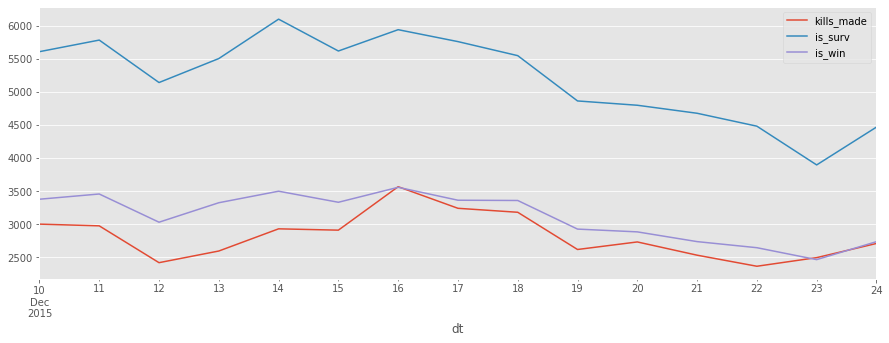

In [95]:
lightTK1s[['kills_made',"is_surv",'is_win']].plot()

print("item_class: light TK")
print("patch: 1")

a = len(lightTK1['player_id'].unique())
print("quality of players = ",a) 

item_class: light TK
patch: 2
quality of players =  226


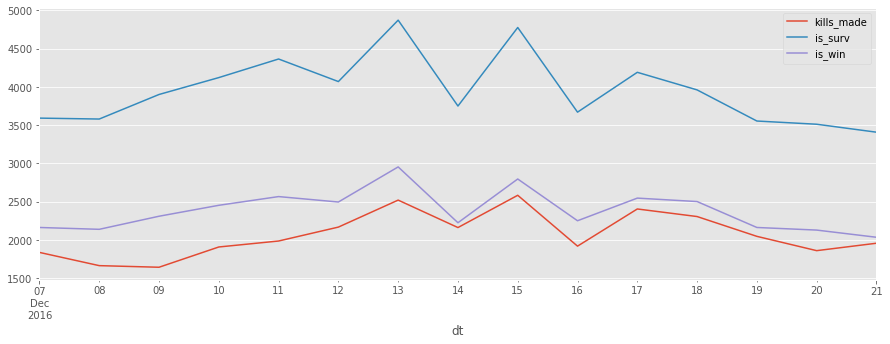

In [96]:
lightTK2s[['kills_made',"is_surv",'is_win']].plot()

print("item_class: light TK")
print("patch: 2")

a = len(lightTK2['player_id'].unique())
print("quality of players = ",a) 

In [ ]:
По классу оружия "light TK" таких значительных улучшений не произошло

In [97]:
mediumTK1 = data.loc[(data['patch'].isin(['1'])) & (data['item_class'].isin(['mediumTK']))]
mediumTK1s = mediumTK1[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

mediumTK2 = data.loc[(data['patch'].isin(['2'])) & (data['item_class'].isin(['lightTK']))]
mediumTK2s = mediumTK2[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

# print(mediumTK1s)
# print(mediumTK2s)

item_class: medium TK
patch: 1
quality of players =  255


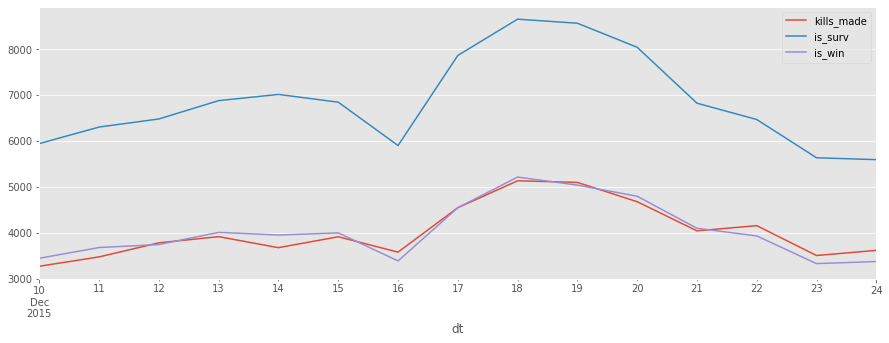

In [98]:
mediumTK1s[['kills_made',"is_surv",'is_win']].plot()

print("item_class: medium TK")
print("patch: 1")

a = len(mediumTK1['player_id'].unique())
print("quality of players = ",a) 

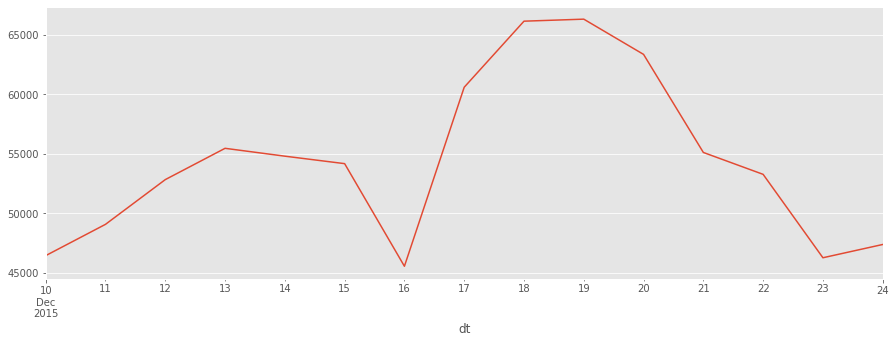

In [100]:
mediumTK1s['item_level'].plot()

item_class: medium TK
patch: 2
quality of players =  226


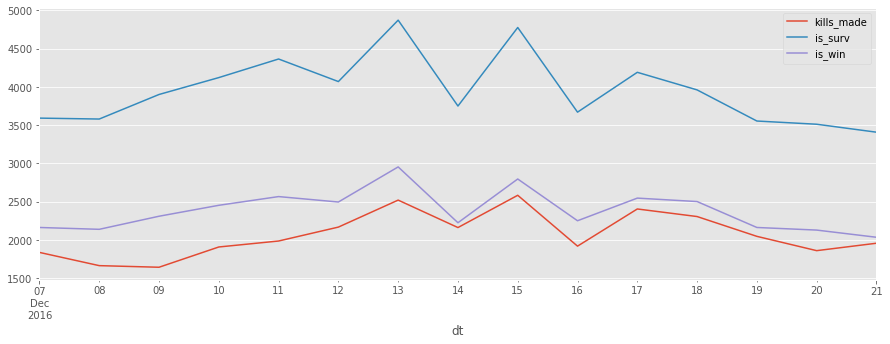

In [99]:
mediumTK2s[['kills_made',"is_surv",'is_win']].plot()

print("item_class: medium TK")
print("patch: 2")

a = len(mediumTK2['player_id'].unique())
print("quality of players = ",a)

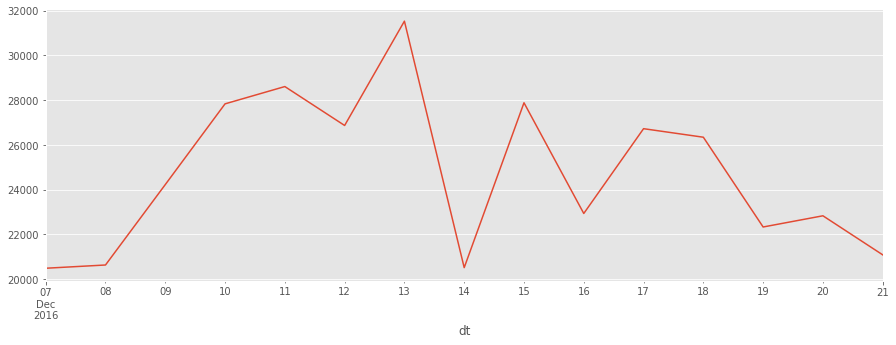

In [101]:
mediumTK2s['item_level'].plot()

Класс оружия "mediumTK" улучшился скорее после первого патча, хотя затем вернулся на прежний уровень

In [102]:
heavyTK1 = data.loc[(data['patch'].isin(['1'])) & (data['item_class'].isin(['heavyTK']))]
heavyTK1s = heavyTK1[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

heavyTK2 = data.loc[(data['patch'].isin(['2'])) & (data['item_class'].isin(['heavyTK']))]
heavyTK2s = heavyTK2[["item_level","kills_made",'credits','exp','is_surv','is_win']].groupby('dt').aggregate(sum)

# print(heavyTK1s)
# print(heavyTK2s)

item_class: heavy TK
patch: 1
quality of players =  254


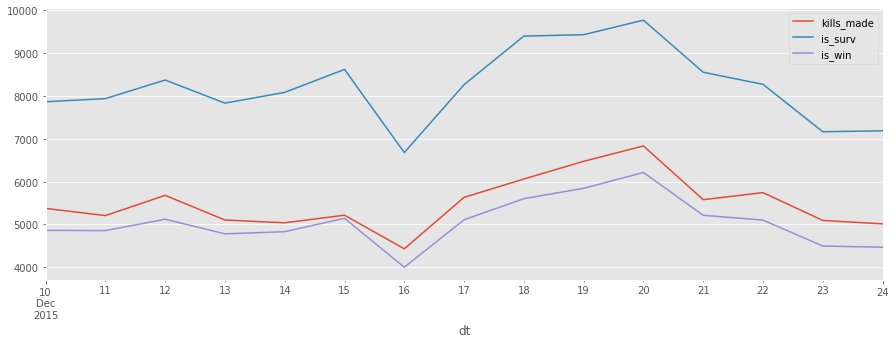

In [40]:
heavyTK1s[['kills_made',"is_surv",'is_win']].plot()

print("item_class: heavy TK")
print("patch: 1")

a = len(heavyTK1['player_id'].unique())
print("quality of players = ",a) 

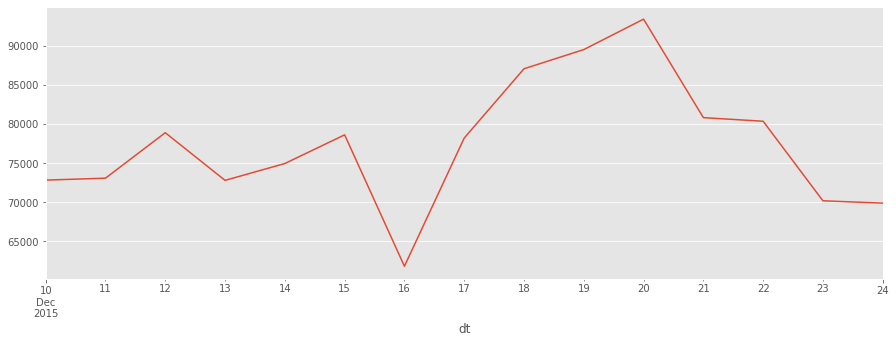

In [103]:
heavyTK1s['item_level'].plot()

item_class: heavy TK
patch: 2
quality of players =  230


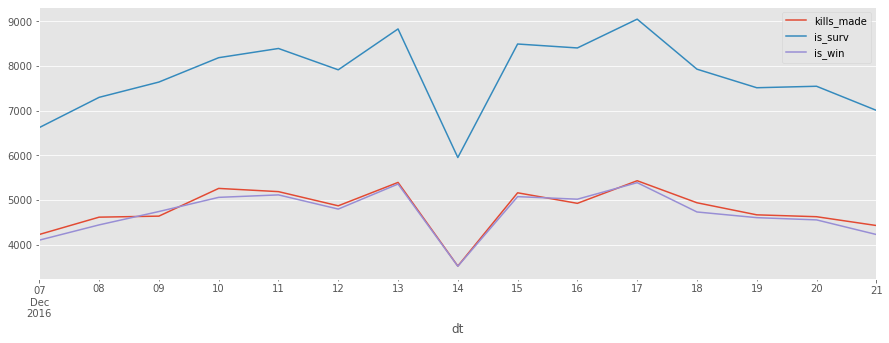

In [104]:
heavyTK2s[['kills_made',"is_surv",'is_win']].plot()

print("item_class: heavy TK")
print("patch: 2")

a = len(heavyTK2['player_id'].unique())
print("quality of players = ",a)

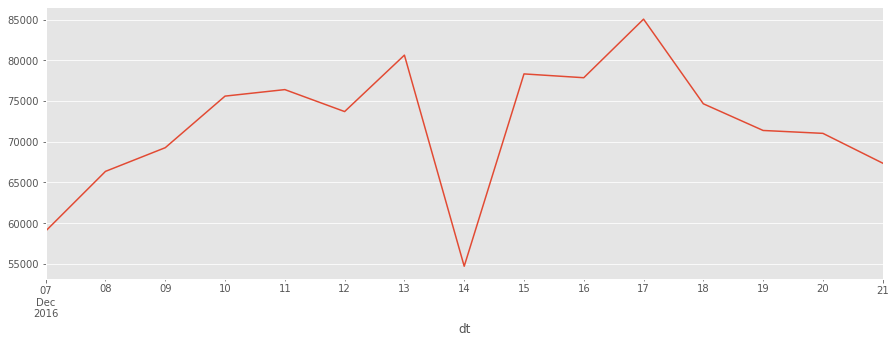

In [105]:
heavyTK2s['item_level'].plot()

In [ ]:
Класс оружия "heavyTK" улучшил свой уровень после обоих патчей
Таким образом, качество игры игроков после боих патчей улучшилось, но лучше оказался все-таки второй патч (особенно для класса оружия "AT-SPG")